# 기계학습

### 담당교수 : 장원중

In [27]:
# 그래프 한글이 깨질때 & 마이너스 부호 사용

import sys, os
from matplotlib import font_manager, rc 
import matplotlib.pyplot as plt

# 한글 폰트 설정 : 윈도우 폰트를 사용하는 경우 
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name) 

# 운영체제별 한글 폰트 설정
# if os.name == 'posix': # Mac 환경 폰트 설정
#     rc('font', family='AppleGothic')
# elif os.name == 'nt': # Windows 환경 폰트 설정
#     rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

# 유니코드에서 음수 부호설정
rc('axes', unicode_minus=False)

# 부모 디렉터리의 파일을 가져올 수 있도록 설정
sys.path.append(os.pardir)     

# jupyter에서 matplotlib 그래프를 출력 영역에 표시  
%matplotlib inline 

# 레티나 설정 - 폰트 주변이 흐릿하게 보이는 것을 방지해 글씨가 좀 더 선명하게 보임
%config InlineBackend.figure_format = 'retina'

In [28]:
# 운영체제별 이름 

import platform

platform.system()

'Windows'

In [29]:
# 파이썬 버전 확인

import sys
import platform

print("--sys.version—")
print(sys.version)

print("--python_version—")
print(platform.python_version())

--sys.version—
3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
--python_version—
3.11.7


# 모델 평가 실습(1)  

## iris 데이터 읽기 

In [30]:
#  iris 데이터 불러오기

from sklearn.datasets import load_iris

iris = load_iris()

print(iris.feature_names)  
# ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

print(iris.target_names)  # ['setosa' 'versicolor' 'virginica']

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [31]:
# 분석의 용이성을 위해 pandas의 DataFrame으로 변환 

import pandas as pd

df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [32]:
# 타겟 데이터도 Seried 구조로 변환 

target = pd.Series(iris.target, dtype="category")
target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: category
Categories (3, int64): [0, 1, 2]

In [33]:
# 타겟값을 숫자에서 문자열('setosa', 'versicolor', 'virginica')로 수정

target =target.cat.rename_categories(iris.target_names)
print(target)

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Length: 150, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']


In [34]:
# 독립변수로 구성된 데이터프레임에 종속변수 속성을 추가 

df_iris["species"] = target
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [35]:
# 열이름 수정

df_iris.rename({"sepal length (cm)":"sepal_length", "sepal width (cm)": "sepal_width", 
                "petal length (cm)":"petal_length", "petal width (cm)":"petal_width"}, axis=1, inplace=True)
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [36]:
# sklearn의 train_test_split 함수로 훈련용 데이터셋(70%)과 성능평가용 데이터셋(30) 분할 

#  scikit-learn model_selection 모듈은 train_test_split 함수로 X_train, X_test, y_train, y_test 데이터셋을 분할

# train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None,)
#  - stratify : 층 구분 변수이름을 입력, 이때 각 층(stratum, group) 별로 나누어서 test_size 비율을 적용해서 추출 
#  - test_size : test set의 비율 
#  - shuffle=True : 무작위 추출(random sampling) / shuffle=False : 체계적 추출(systematic sampling) 
#  - random_state : 재현가능성을 위해서 난수 초기값으로 아무 숫자나 지정

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_iris.iloc[:, :-1], 
                                                    df_iris.iloc[:, -1], 
                                                    test_size=0.3, 
                                                    shuffle=True,               # shuffle=True : 무작위 추출(random sampling)
                                                    stratify=df_iris['species'], # stratify : 층 구분 변수이름 
                                                    random_state=42)             # 데이터셋 분할결과를 반환 

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(y_train.value_counts())
print(y_test.value_counts())

(105, 4) (45, 4) (105,) (45,)
setosa        35
versicolor    35
virginica     35
Name: species, dtype: int64
setosa        15
versicolor    15
virginica     15
Name: species, dtype: int64


In [37]:
# 표준화 (StandardScaler)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 의사결정나무 모델 생성 및 학습

In [38]:
# 데이터 분석 결과를 토대로 적합한 알고리즘을 선택  
#  - GridSearchCV 결과를 반영한 모델 생성 

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(splitter='random',random_state=42,max_depth=4) # 모델 생성  
model.fit(X_train, y_train)                                                   # 학습 

DecisionTreeClassifier(max_depth=4, random_state=42, splitter='random')

In [13]:
# ?DecisionTreeClassifier
# DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1,
#                        min_weight_fraction_leaf=0.0,max_features=None,random_state=None,max_leaf_nodes=None,
#                        min_impurity_decrease=0.0,class_weight=None,ccp_alpha=0.0,)

# Best Estimator:
#  DecisionTreeClassifier(max_depth=4, random_state=42, splitter='random')

# Best Params:
#  {'criterion': 'gini', 'max_depth': 4, 'min_impurity_decrease': 0.0, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'random'}

# Best Score:
#  0.9627272727272727

## 아이리스 데이터셋의 Confusion Matrix

In [39]:
# 아이리스 데이터셋의 Confusion Matrix

from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)
confMatrix = confusion_matrix(y_test, pred)
print("Confusion Matrix : \n", confMatrix)
# Confusion Matrix : 
#  [[14  1  0]
#   [ 0 13  2]
#   [ 0  5 10]]

Confusion Matrix : 
 [[14  1  0]
 [ 0 13  2]
 [ 0  5 10]]


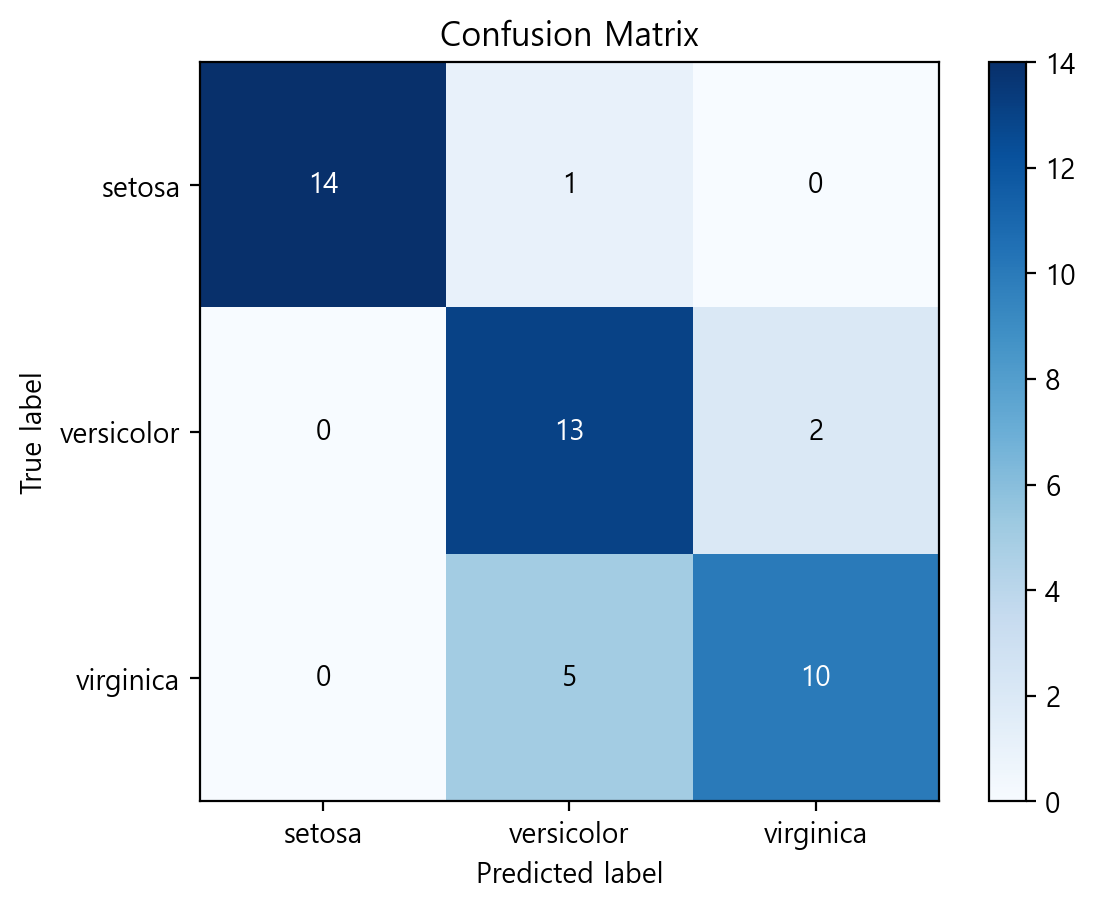

In [40]:
# scikit-plot을 이용하면 confusion matrix를 좀 더 직관적인 heatmap으로 시각화 
# scikit-learn에서는 가로축과 세로축의 라벨이 없었던 반면에 scikit-plot은 축 라벨이 있어서 결과를 해석하기가 좀 더 용이함

import scikitplot as skplt

pred = model.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, pred)
plt.show()

## 모델 평가 - 정확도 

In [41]:
# 정확도 

from sklearn.metrics import accuracy_score
import numpy as np 

pred = model.predict(X_test)
acc = np.round(accuracy_score(y_test, pred), 4)
print("Accuracy : ", acc)               # Accuracy :  0.8222

Accuracy :  0.8222


## 정밀도(precision)

In [42]:
# 정밀도(precision)는 예측한 클래스 중에 실제로 맞은 비율이다.
#  - precision = TP / (TP + FP)
#  - setosa의 정밀도: 14 / 14 = 1.0 
#  - versicolor의 정밀도: 13 / (1+13+5) = 0.68421 
#  - virginica의 정밀도: 10 / (2+10) = 0.83333 

from sklearn.metrics import precision_score

# average 기본값은 binary이며 다중 분류 일 때는 binary가 아니어야 함
precisions = precision_score(y_test, model.predict(X_test), average=None)

for target, score in zip(iris.target_names, precisions):
    print(f"{target}의 정밀도: {score}")
    
# setosa의 정밀도: 1.0
# versicolor의 정밀도: 0.6842105263157895
# virginica의 정밀도: 0.8333333333333334    

setosa의 정밀도: 1.0
versicolor의 정밀도: 0.6842105263157895
virginica의 정밀도: 0.8333333333333334


## 재현율(recall) 또는 민감도(sensitivity)

In [43]:
# 재현율은 실제 타겟 클래스 중에 예측이 맞은 비율이다. 
#  - sensitivity = TP / (TP + FN)
#  - setosa의 재현율: 14 / (14+1) = 0.9333333333333333
#  - versicolor의 재현율: 13 / (13 + 2) = 0.8666666666666667
#  - virginica의 재현율: 10 / (5 + 10) = 0.6666666666666666

from sklearn.metrics import recall_score

# average 기본값은 binary이며 다중 분류 일 때는 binary가 아니어야 함
recalls = recall_score(y_test, model.predict(X_test), average=None)

for target, score in zip(iris.target_names, recalls):
    print(f"{target}의 재현율: {score}")

# setosa의 재현율: 0.9333333333333333
# versicolor의 재현율: 0.8666666666666667
# virginica의 재현율: 0.6666666666666666    

setosa의 재현율: 0.9333333333333333
versicolor의 재현율: 0.8666666666666667
virginica의 재현율: 0.6666666666666666


## F-점수(f-score) / F1-점수 (f1-score)

In [44]:
# 정밀도와 재현율(민감도)의 가중조화평균(weight harmonic average)을 F점수(F-score)라고 한다. 

# F1-점수(f1-score)는 정밀도와 재현율(민감도)의 조화평균을 나타내며 정밀도와 재현율(민감도)에 같은 가중치를 부여하여 평균하게 된다.
# - setosa의 f1-score: (2*1.0*0.9333333333333333)/(1.0+0.9333333333333333) = 0.9655172413793104
# - versicolor의 f1-score: (2*0.6842105263157895*0.8666666666666667)/(0.6842105263157895+0.8666666666666667) = 0.7647058823529413 
# - virginica의 f1-score: (2*0.8333333333333334*0.6666666666666666)/(0.8333333333333334+0.6666666666666666) = 0.7407407407407408  

from sklearn.metrics import fbeta_score, f1_score

# average 기본값은 binary이며 다중 분류 일 때는 binary가 아니어야 함
fbetas = fbeta_score(y_test, model.predict(X_test), average=None, beta=2)

for target, score in zip(iris.target_names, fbetas):
    print(f"{target}의 f-beta: {score}")

print('-' * 40)

f1s = f1_score(y_test, model.predict(X_test), average=None)
for target, score in zip(iris.target_names, f1s):
    print(f"{target}의 f1-score: {score}")

# setosa의 f1-score: 0.9655172413793104
# versicolor의 f1-score: 0.7647058823529413
# virginica의 f1-score: 0.7407407407407408    

setosa의 f-beta: 0.9459459459459459
versicolor의 f-beta: 0.8227848101265822
virginica의 f-beta: 0.6944444444444444
----------------------------------------
setosa의 f1-score: 0.9655172413793104
versicolor의 f1-score: 0.7647058823529413
virginica의 f1-score: 0.7407407407407408


In [45]:
(2*1.0*0.9333333333333333)/(1.0+0.9333333333333333)

0.9655172413793104

In [46]:
(2*0.6842105263157895*0.8666666666666667)/(0.6842105263157895+0.8666666666666667)

0.7647058823529413

In [47]:
(2*0.8333333333333334*0.6666666666666666)/(0.8333333333333334+0.6666666666666666)

0.7407407407407408

## Classification_Report

In [49]:
# classification_report : 
# 각각의 클래스를 양성(positive) 클래스로 보았을 때의 정밀도, 재현율, F1점수를 각각 구하고 그 평균값으로 전체 모형의 성능을 평가한다.

from sklearn.metrics import classification_report

print(classification_report(y_test, model.predict(X_test), target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      0.93      0.97        15
  versicolor       0.68      0.87      0.76        15
   virginica       0.83      0.67      0.74        15

    accuracy                           0.82        45
   macro avg       0.84      0.82      0.82        45
weighted avg       0.84      0.82      0.82        45



In [20]:
# Confusion Matrix 예제

from sklearn.metrics import confusion_matrix

y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [21]:
# classification_report

from sklearn.metrics import classification_report

y_true = [0, 0, 0, 1, 1, 0, 0]
y_pred = [0, 0, 0, 0, 1, 1, 1]
print(classification_report(y_true, y_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.75      0.60      0.67         5
     class 1       0.33      0.50      0.40         2

    accuracy                           0.57         7
   macro avg       0.54      0.55      0.53         7
weighted avg       0.63      0.57      0.59         7



## 아이리스 데이터셋으로 ROC 곡선 그리기 

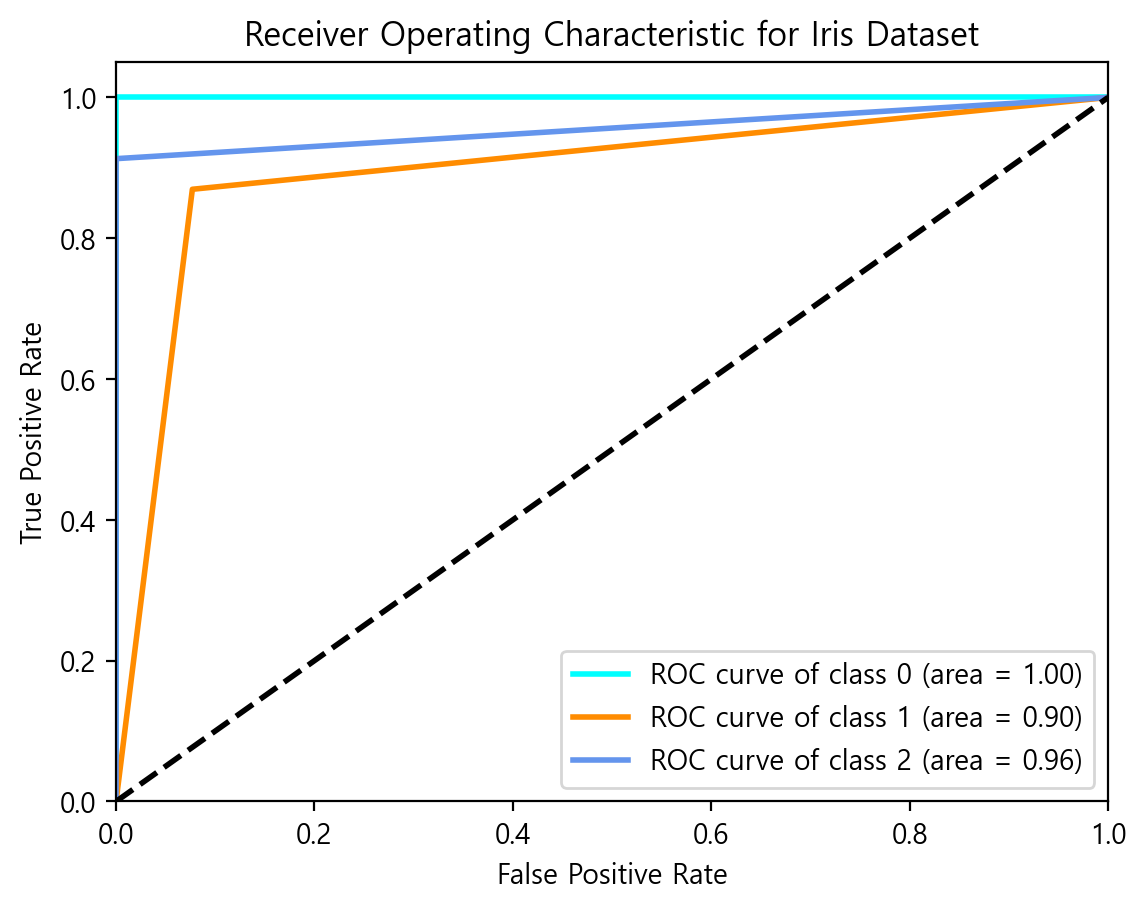

In [22]:
# 다중 클래스 문제를 One-vs-Rest (OvR) 방식으로 처리하여 각 클래스에 대한 ROC 곡선을 그림

# 코드 설명
# 아이리스 데이터셋 로드: datasets.load_iris()를 사용하여 데이터를 로드함
# 이진화: label_binarize 함수를 사용하여 다중 클래스 라벨을 이진화함
# 데이터 분할: train_test_split을 사용하여 데이터를 학습용과 테스트용으로 나눔
# 표준화: StandardScaler를 사용하여 데이터를 표준화함
# One-vs-Rest 분류기 설정: OneVsRestClassifier와 DecisionTreeClassifier를 사용하여 각 클래스에 대해 이진 분류기를 학습시킴
# ROC 곡선 그리기: 각 클래스에 대해 ROC 곡선을 그리고, 이를 한 그래프에 표시함
# 이 코드를 실행하면 아이리스 데이터셋에 대한 각 클래스의 ROC 곡선을 시각화할 수 있음

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# 아이리스 데이터셋 로드
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 데이터를 이진화 (One-vs-Rest)
y_binarized = label_binarize(y, classes=[0, 1, 2])
n_classes = y_binarized.shape[1]

# 데이터 분할 (학습용 데이터와 테스트용 데이터로 나누기)
X_train, X_test, y_train, y_test = train_test_split(X, y_binarized, test_size=0.5, random_state=42)

# 표준화 (StandardScaler)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 분류기 설정
classifier = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))

# 모델 학습 및 예측 확률 계산
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# ROC 곡선을 그리기 위한 설정
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 전체 ROC 곡선 그리기
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Iris Dataset')
plt.legend(loc="lower right")
plt.show()

# class 0:'setosa', class 1:'versicolor', class 2:'virginica']

# 모델 평가 실습(2) 

## 이진 분류 데이터셋으로 ROC 곡선 그리기 

In [178]:
# make() 함수로 변수가 2개인 이진 분류 데이터 100개를 생성한다.   
#  - X : 독립변수 
#  - y : 종속변수 

# make_classification함수는 설정에 따른 분류용 가상 데이터를 생성하는 명령이다. 
#                 이 함수의 인수와 반환값은 다음과 같다.
#  [인수]
#  - n_samples : 표본 데이터의 수, 디폴트 100
#  - n_features : 독립 변수의 수, 디폴트 20 
#  - n_informative : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2 
#  - n_redundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2 
#  - n_repeated : 독립 변수 중 단순 중복된 성분의 수, 디폴트 0 
#  - n_classes : 종속 변수의 클래스 수, 디폴트 2 
#  - n_clusters_per_class : 클래스 당 클러스터의 수, 디폴트 2 
#  - weights : 각 클래스에 할당된 표본 수 
#  - random_state : 난수 발생 시드 
#  [반환값]
#  - X : [n_samples, n_features] 크기의 배열 - 독립변수 
#  - y : [n_samples] 크기의 배열 - 종속변수 

from sklearn.datasets import make_classification

X, y = make_classification(n_samples=4000, n_features=2, n_informative=2, n_classes=2, 
                           weights=[0.9, 0.1], n_redundant=0, random_state=0)
print(X.shape)
print(y.shape)
print(X[:10]) 
print(y[:10])

(4000, 2)
(4000,)
[[-1.68634397 -1.48712614]
 [-1.13876586 -0.011514  ]
 [-0.83921101 -0.97389947]
 [ 1.30473783 -1.72571204]
 [ 1.09798932 -0.9857081 ]
 [-1.63157569 -0.17534754]
 [-0.74394882 -0.85514724]
 [-0.3580264  -2.37929683]
 [-1.36898688 -1.18195672]
 [-1.0031273   1.01371182]]
[0 0 0 0 0 0 0 0 0 1]


In [159]:
# 분석의 용이성을 위해 pandas의 DataFrame으로 변환 

import pandas as pd

df_data = pd.DataFrame(data=X, columns=['att1','att2'])
df_data

,att1,att2
0,-1.686344,-1.487126
1,-1.138766,-0.011514
2,-0.839211,-0.973899
3,1.304738,-1.725712
4,1.097989,-0.985708
...,...,...
3995,-1.127836,-0.527921
3996,0.687904,-1.015994
3997,-1.343565,-1.339740
3998,0.504518,0.782109


In [160]:
# 타겟 데이터도 Seried 구조로 변환 

target = pd.Series(y, dtype="category")
target

0       0
1       0
2       0
3       0
4       0
       ..
3995    0
3996    0
3997    0
3998    1
3999    0
Length: 4000, dtype: category
Categories (2, int64): [0, 1]

In [161]:
# 독립변수로 구성된 데이터프레임에 종속변수 속성을 추가 

df_data["class"] = target
df_data

,att1,att2,class
0,-1.686344,-1.487126,0
1,-1.138766,-0.011514,0
2,-0.839211,-0.973899,0
3,1.304738,-1.725712,0
4,1.097989,-0.985708,0
...,...,...,...
3995,-1.127836,-0.527921,0
3996,0.687904,-1.015994,0
3997,-1.343565,-1.339740,0
3998,0.504518,0.782109,1


In [162]:
# sklearn의 train_test_split 함수로 훈련용 데이터셋(70%)과 성능평가용 데이터셋(30) 분할 

#  scikit-learn model_selection 모듈은 train_test_split 함수로 X_train, X_test, y_train, y_test 데이터셋을 분할

# train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None,)
#  - stratify : 층 구분 변수이름을 입력, 이때 각 층(stratum, group) 별로 나누어서 test_size 비율을 적용해서 추출 
#  - test_size : test set의 비율 
#  - shuffle=True : 무작위 추출(random sampling) / shuffle=False : 체계적 추출(systematic sampling) 
#  - random_state : 재현가능성을 위해서 난수 초기값으로 아무 숫자나 지정

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_data.iloc[:, :-1], 
                                                    df_data.iloc[:, -1], 
                                                    test_size=0.5, 
                                                    shuffle=True,               # shuffle=True : 무작위 추출(random sampling)
                                                    stratify=df_data['class'],  # stratify : 층 구분 변수이름 
                                                    random_state=42)            # 데이터셋 분할결과를 반환 

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(y_train.value_counts())
print(y_test.value_counts())

(2000, 2) (2000, 2) (2000,) (2000,)
0    1791
1     209
Name: class, dtype: int64
0    1792
1     208
Name: class, dtype: int64


In [163]:
# 표준화 (StandardScaler)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [164]:
# 로지스틱회귀 모델을 생성 및 예측하기   

from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X_train, y_train)
x_hat = model.predict(X_test)
print(x_hat)   
# [1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0]

[0 0 0 ... 0 0 0]


In [165]:
# 분류기에서 예측의 불확실성을 추정하는 함수는 decision_function()과 predict_proba() 크게 두 가지가 있다. 
#  - 대부분의 분류 클래스가 두 함수(최소 한개)를 제공한다.
#  - 이진분류뿐만 아니라 다중 분류에도 사용할 수 있다.

# decision_function() : 분류기에서 예측의 불확실성을 추정하는 함수이다. 
#  - 임의의 범위를 갖고 있다. 
#  - 불균형 데이터에서 임계값을 바꾸면 더 좋은 결과를 얻을 수 있지만 범위가 정해진 것이 아니기 때문에 최적의 임계점을 고르는게 쉽지 않다.
#  - 이진 분류에서 decision_function 결과값은 n_samples이며 각 샘플이 하나의 실수 값을 반환한다.
#  - 다중 분류에서 decision_function 의 결과값의 크기는 (n_samples, n_classes)이다. 
#  - 위의 결과는 샘플이 20개, 이진 분류이므로 decision_function 결과값은 20개이며 각 샘플이 하나의 실수 값을 반환한다. 

f_value = model.decision_function(X_test)
print(f_value)
#[ 0.48367038 -0.76380132 -0.93074418  6.06480007 -1.7032021  -1.13695011
#  1.38691113 -1.98502227  3.29544344 -1.74286561  0.58063599  1.20116844
#  1.71499282 -1.10505939 -2.00296387  0.53679248  2.95851366 -3.65762946
#  2.66999382 -1.48393826]

[-4.10008967 -9.04498388 -4.78060236 ... -0.22573692 -6.23400232
 -3.65850903]


In [166]:
# 분류기에서 예측의 불확실성을 추정하는 함수는 decision_function과 predict_proba 크게 두가지가 있다. 
#  - 대부분의 분류 클래스가 두 함수(최소 한개)를 제공한다.
#  - 이진분류뿐만 아니라 다중 분류에도 사용할 수 있다.

# predict_proba() 함수 : 0과 1 사이 값으로 범위가 고정되어 있기 때문에 임계값 선택이 더 쉽고 결정 함수에 비해 해석도 더 용이하다.
#  - predict_proba() 함수 각 클래스에 대한 확률이며 decision_function 보다 이해하기 쉽다. 
#  - 확률값이기 때문에 항상 0과 1 사이의 값을 가지며 두 클래스의 확률 합은 항상 1이다. 

pp_value = model.predict_proba(X_test)
print(pp_value)                         # predict_proba() 함수 각 클래스에 대한 확률 
print(pp_value.sum(axis=1))             # 두 클래스의 함 
print(np.argmax(pp_value, axis=1))      # 가장 큰 결정 함수의 인덱스 
print(x_hat)                            # 예측값  

[[9.83698939e-01 1.63010614e-02]
 [9.99882033e-01 1.17967446e-04]
 [9.91678879e-01 8.32112105e-03]
 ...
 [5.56195801e-01 4.43804199e-01]
 [9.98042255e-01 1.95774499e-03]
 [9.74876546e-01 2.51234536e-02]]
[1. 1. 1. ... 1. 1. 1.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [167]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.vstack([f_value, x_hat, y_test]).T, columns=["f", "x_hat", "y_test"])
df.sort_values("f", ascending=False).reset_index(drop=True)

,f,x_hat,y_test
0,6.171748,1.0,1.0
1,5.527739,1.0,1.0
2,5.453483,1.0,1.0
3,5.286011,1.0,1.0
4,4.009100,1.0,1.0
...,...,...,...
1995,-11.566463,0.0,0.0
1996,-11.680501,0.0,0.0
1997,-11.793840,0.0,0.0
1998,-11.829542,0.0,0.0


In [168]:
# 이진 분류 결과 

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, x_hat, labels=[0, 1])
# array([[15,  0],
#        [ 2, 13]], dtype=int64)

array([[1744,   48],
       [  89,  119]], dtype=int64)

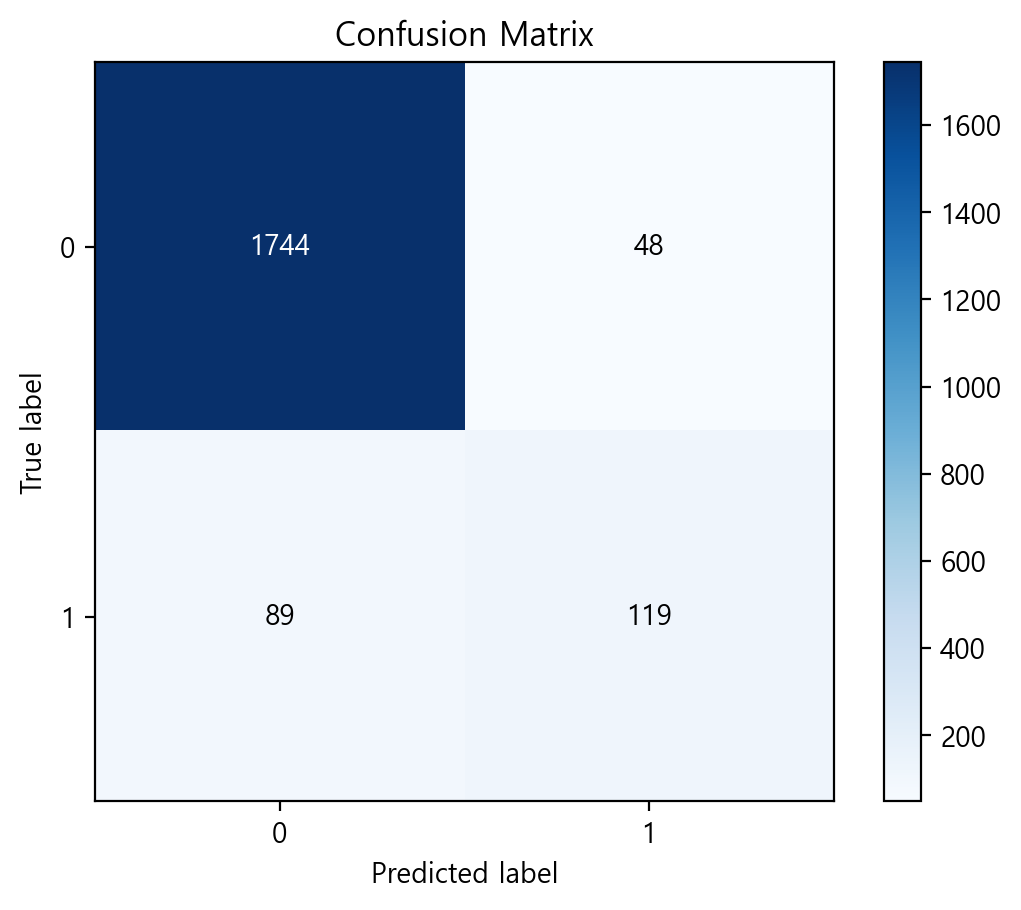

In [169]:
# scikit-plot을 이용하면 confusion matrix를 좀 더 직관적인 heatmap으로 시각화한다. 
# scikit-learn에서는 가로축과 세로축의 라벨이 없었던 반면에 scikit-plot은 축 라벨이 있어서 결과를 해석하기가 좀 더 용이하다.

import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test, x_hat)
plt.show()

In [179]:
# 재현율(recall) = TP / (TP+FN), 위양성율(fall-out) = FP / (FP+TN) 계산 

from sklearn.metrics import recall_score

# average 기본값은 binary이며 다중 분류일 때는 binary가 아니어야 함
recalls = recall_score(y_test, x_hat)
recalls                    # 0.5721153846153846

0.5721153846153846

In [180]:
# classification_report

from sklearn.metrics import classification_report

print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1792
           1       0.71      0.57      0.63       208

    accuracy                           0.93      2000
   macro avg       0.83      0.77      0.80      2000
weighted avg       0.93      0.93      0.93      2000



## 로지스틱 회귀(Logistic Regression) 모델, 서포트 벡터 머신(SVC) 모델  성능 비교  

In [174]:
# 서포트 벡터 머신(SVC) 모델 

from sklearn.svm import SVC

model2 = SVC(gamma=0.0001, C=3000, probability=True).fit(X_train, y_train)
x_hat2 = model2.predict(X_test)

print(confusion_matrix(y_test, x_hat2))
#[[940   3]
# [ 30  27]]

[[1755   37]
 [ 101  107]]


In [175]:
# classification_report

from sklearn.metrics import classification_report

print(classification_report(y_test, model2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1792
           1       0.74      0.51      0.61       208

    accuracy                           0.93      2000
   macro avg       0.84      0.75      0.79      2000
weighted avg       0.92      0.93      0.93      2000



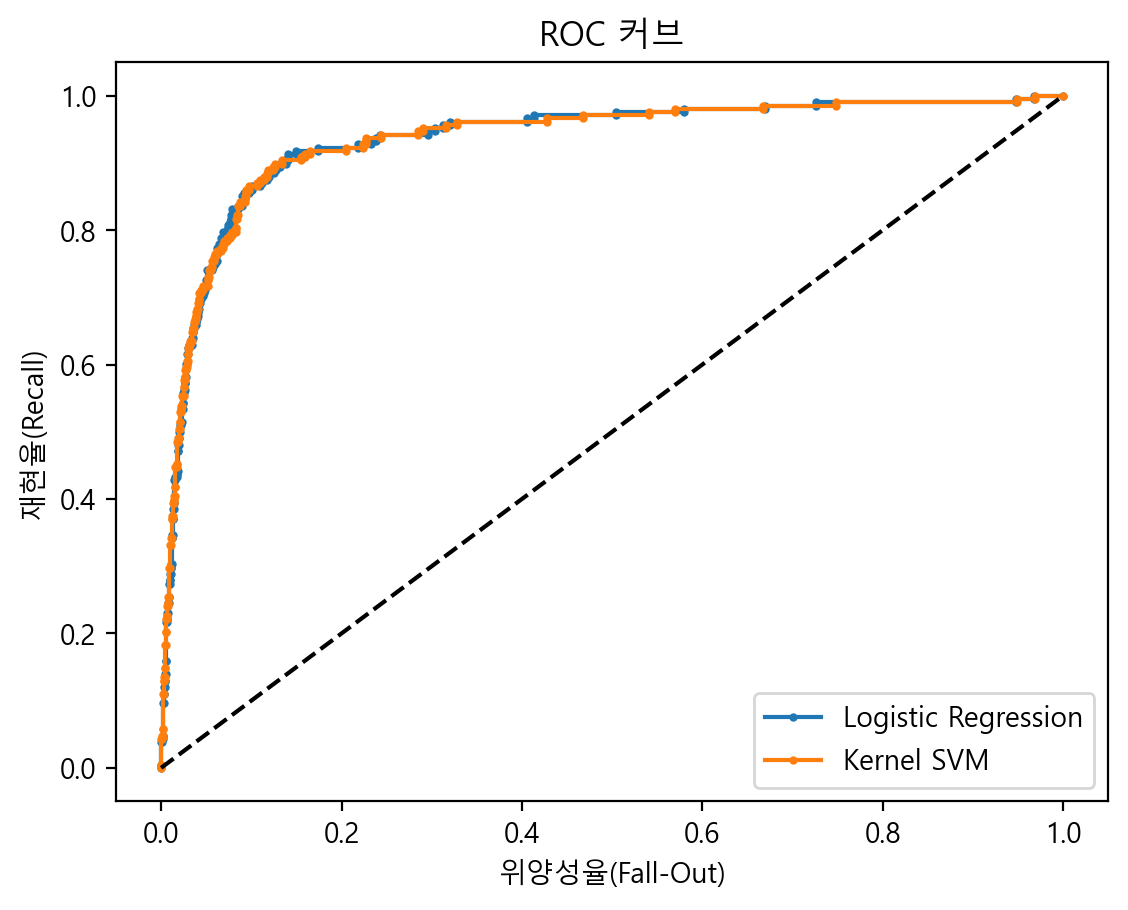

In [176]:
# ROC 곡선 비교 
# 사이킷런 패키지에서 만들어진 모형은 기본적으로 정확도(accuracy)를 최대화하는 모형임
# 하지만 정확도, 정밀도, 재현율 등의 성능이 동일한 모형도 ROC 커브에서 살펴보면 성능이 달라지는 것을 볼 수 있음

from sklearn.metrics import roc_curve  
import matplotlib.pyplot as plt

fpr1, tpr1, thresholds1 = roc_curve(y_test, model.decision_function(X_test))
fpr2, tpr2, thresholds1 = roc_curve(y_test, model2.decision_function(X_test))

plt.rcParams["font.family"] = 'Malgun Gothic'
plt.plot(fpr1, tpr1, 'o-', ms=2, label="Logistic Regression")
plt.plot(fpr2, tpr2, 'o-', ms=2, label="Kernel SVM")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('위양성율(Fall-Out)')
plt.ylabel('재현율(Recall)')
plt.title('ROC 커브')
plt.show()